# Make a Machine Learning model to  predict whether or not they have heart disease?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
heart=pd.read_csv('heart(Predict Heart Disease).csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis  EDA

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
for col in heart.columns:
    print(col,heart[col].unique(),'',sep='\n------------\n')

age
------------
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
------------

sex
------------
[1 0]
------------

cp
------------
[3 2 1 0]
------------

trestbps
------------
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
------------

chol
------------
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 

# data preprocessing

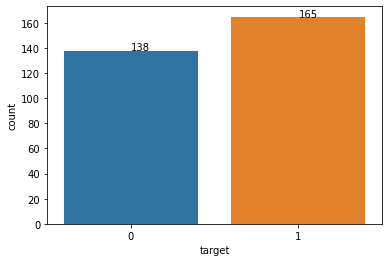

In [21]:
f=sns.countplot(x='target',data=heart,)
for i in f.patches:
    x= i.get_x()+i.get_width()/2
    y= i.get_y()+i.get_height()
    plt.annotate(i.get_height(),(x,y))

##### observations:
     1.We have 165 person with heart disease and 138 person without heart disease, so our problem is balanced.

In [22]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

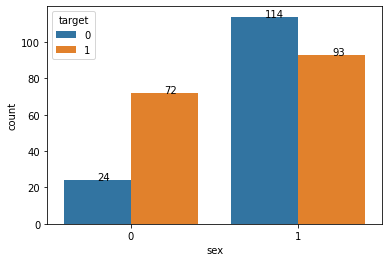

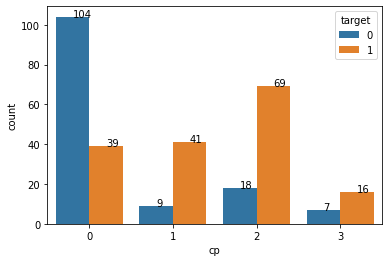

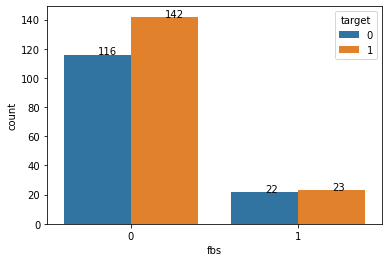

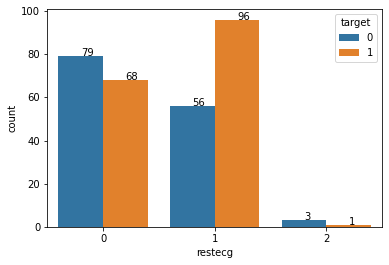

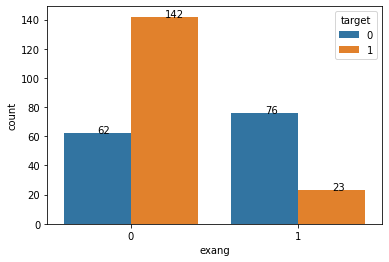

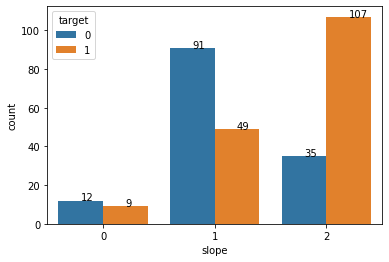

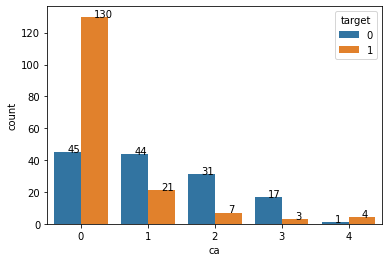

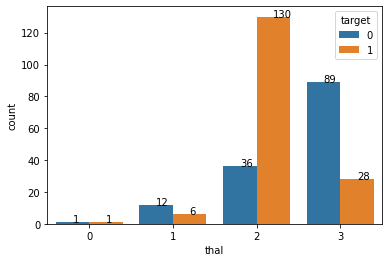

In [24]:
for col in ['sex','cp','fbs','restecg','exang','slope','ca','thal']:
    f=sns.countplot(x=col,data=heart,hue='target')
    for i in f.patches:
        x= i.get_x()+i.get_width()/2
        y= i.get_y()+i.get_height()
        plt.annotate(i.get_height(),(x,y))
    plt.show()

##### observations:
    1.cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
    2.restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
    3.exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
    4.slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
    5.ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
    6.thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

<AxesSubplot:>

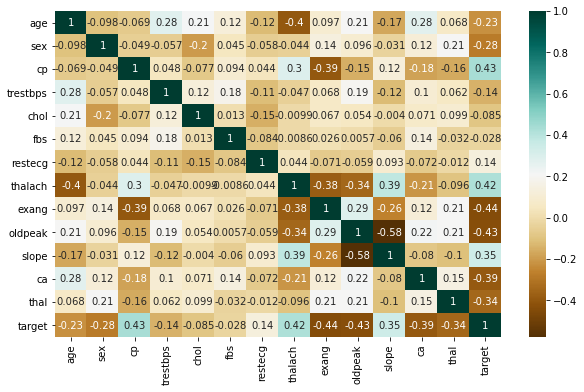

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(heart.corr(),annot=True,cmap='BrBG')

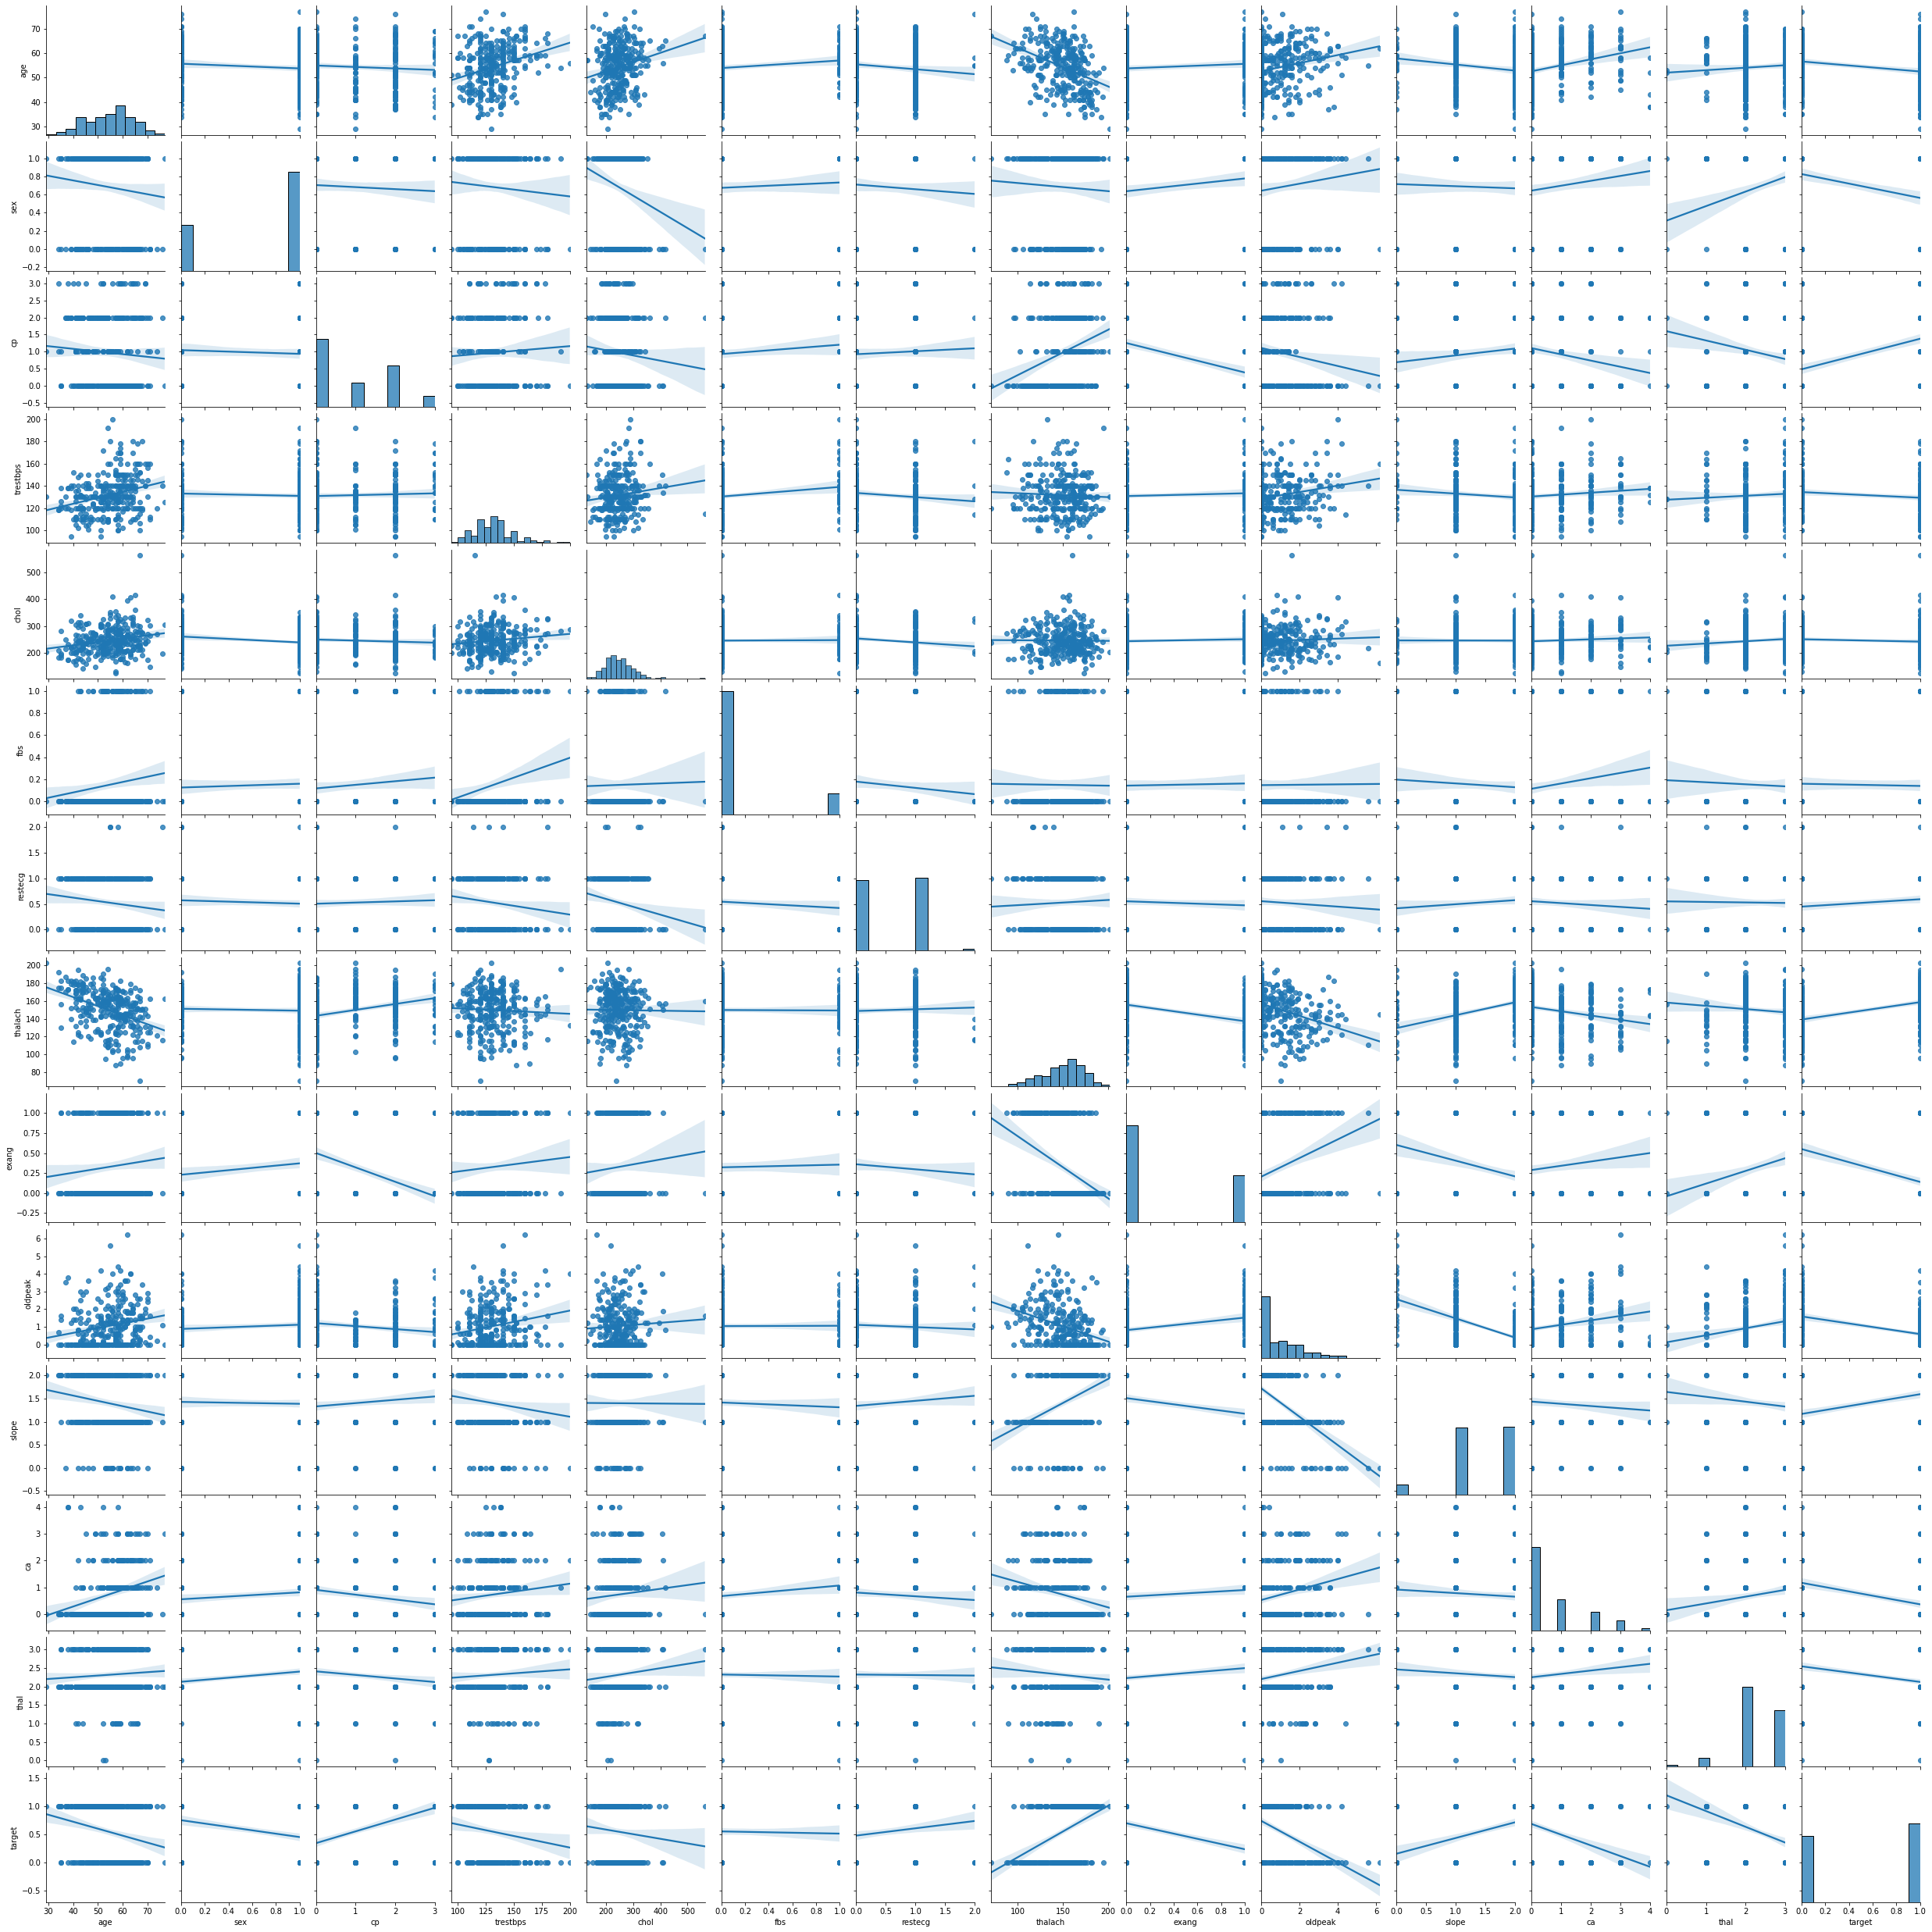

In [27]:
sns.pairplot(heart,kind='reg')

# 1. splitting teh data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = heart.drop('target', axis=1)
y = heart.target

In [32]:
X.shape

(303, 13)

In [33]:
y.shape

(303,)

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
print(xtrain.info())
print(xtest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 286 to 265
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 26.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 246 to 283
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     int64  
 1   sex       61 non-null  

In [42]:
print(ytrain.shape)
print(ytest.shape)

(242,)
(61,)


# 2.creating the machine learing model

In [59]:
from sklearn.linear_model import LinearRegression


model3 = LinearRegression()
model3 .fit(xtrain, ytrain)

print('%.1f%%'%(model.score(xtest,ytest)*100))
print('%.1f%%'%(model.score(xtrain,ytrain)*100))

77.0%
86.0%


In [46]:
def score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
model = LogisticRegression(solver='liblinear')
model.fit(xtrain, ytrain)

score(model, xtrain, ytrain, xtest, ytest, train=True)
score(model, xtrain, ytrain, xtest, ytest, train=False)

Train Result:
Accuracy Score: 85.95%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.870968    0.852349  0.859504    0.861658      0.860274
recall       0.786408    0.913669  0.859504    0.850038      0.859504
f1-score     0.826531    0.881944  0.859504    0.854238      0.858359
support    103.000000  139.000000  0.859504  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 81  22]
 [ 12 127]]

Test Result:
Accuracy Score: 77.05%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.838710   0.700000  0.770492   0.769355      0.779588
recall      0.742857   0.807692  0.770492   0.775275      0.770492
f1-score    0.787879   0.750000  0.770492   0.768939      0.771734
support    35.000000  26.000000  0.770492  61.000000     61.000000
________

In [67]:
test_score ='%.1f%%'%(model.score(xtest,ytest)*100)
train_score ='%.1f%%'%(model.score(xtrain,ytrain)*100)
print(test_score)
print(train_score)

77.0%
86.0%


In [55]:
from sklearn.tree import DecisionTreeClassifier


model2 = DecisionTreeClassifier(random_state=42)
model2 .fit(xtrain, ytrain)

score(model2 , xtrain, ytrain, xtest, ytest, train=True)
score(model2 ,xtrain, ytrain, xtest, ytest, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    103.0  139.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[103   0]
 [  0 139]]

Test Result:
Accuracy Score: 78.69%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.892857   0.696970  0.786885   0.794913      0.809364
recall      0.714286   0.884615  0.786885   0.799451      0.786885
f1-score    0.793651   0.779661  0.786885   0.786656      0.787688
support    35.000000  26.000000  0.786885  61.000000     61.000000
_______________________________________________
Confusion Matr

In [68]:
test_score ='%.1f%%'%(model2.score(xtest,ytest)*100)
train_score ='%.1f%%'%(model2.score(xtrain,ytrain)*100)
print(test_score)
print(train_score)

78.7%
100.0%


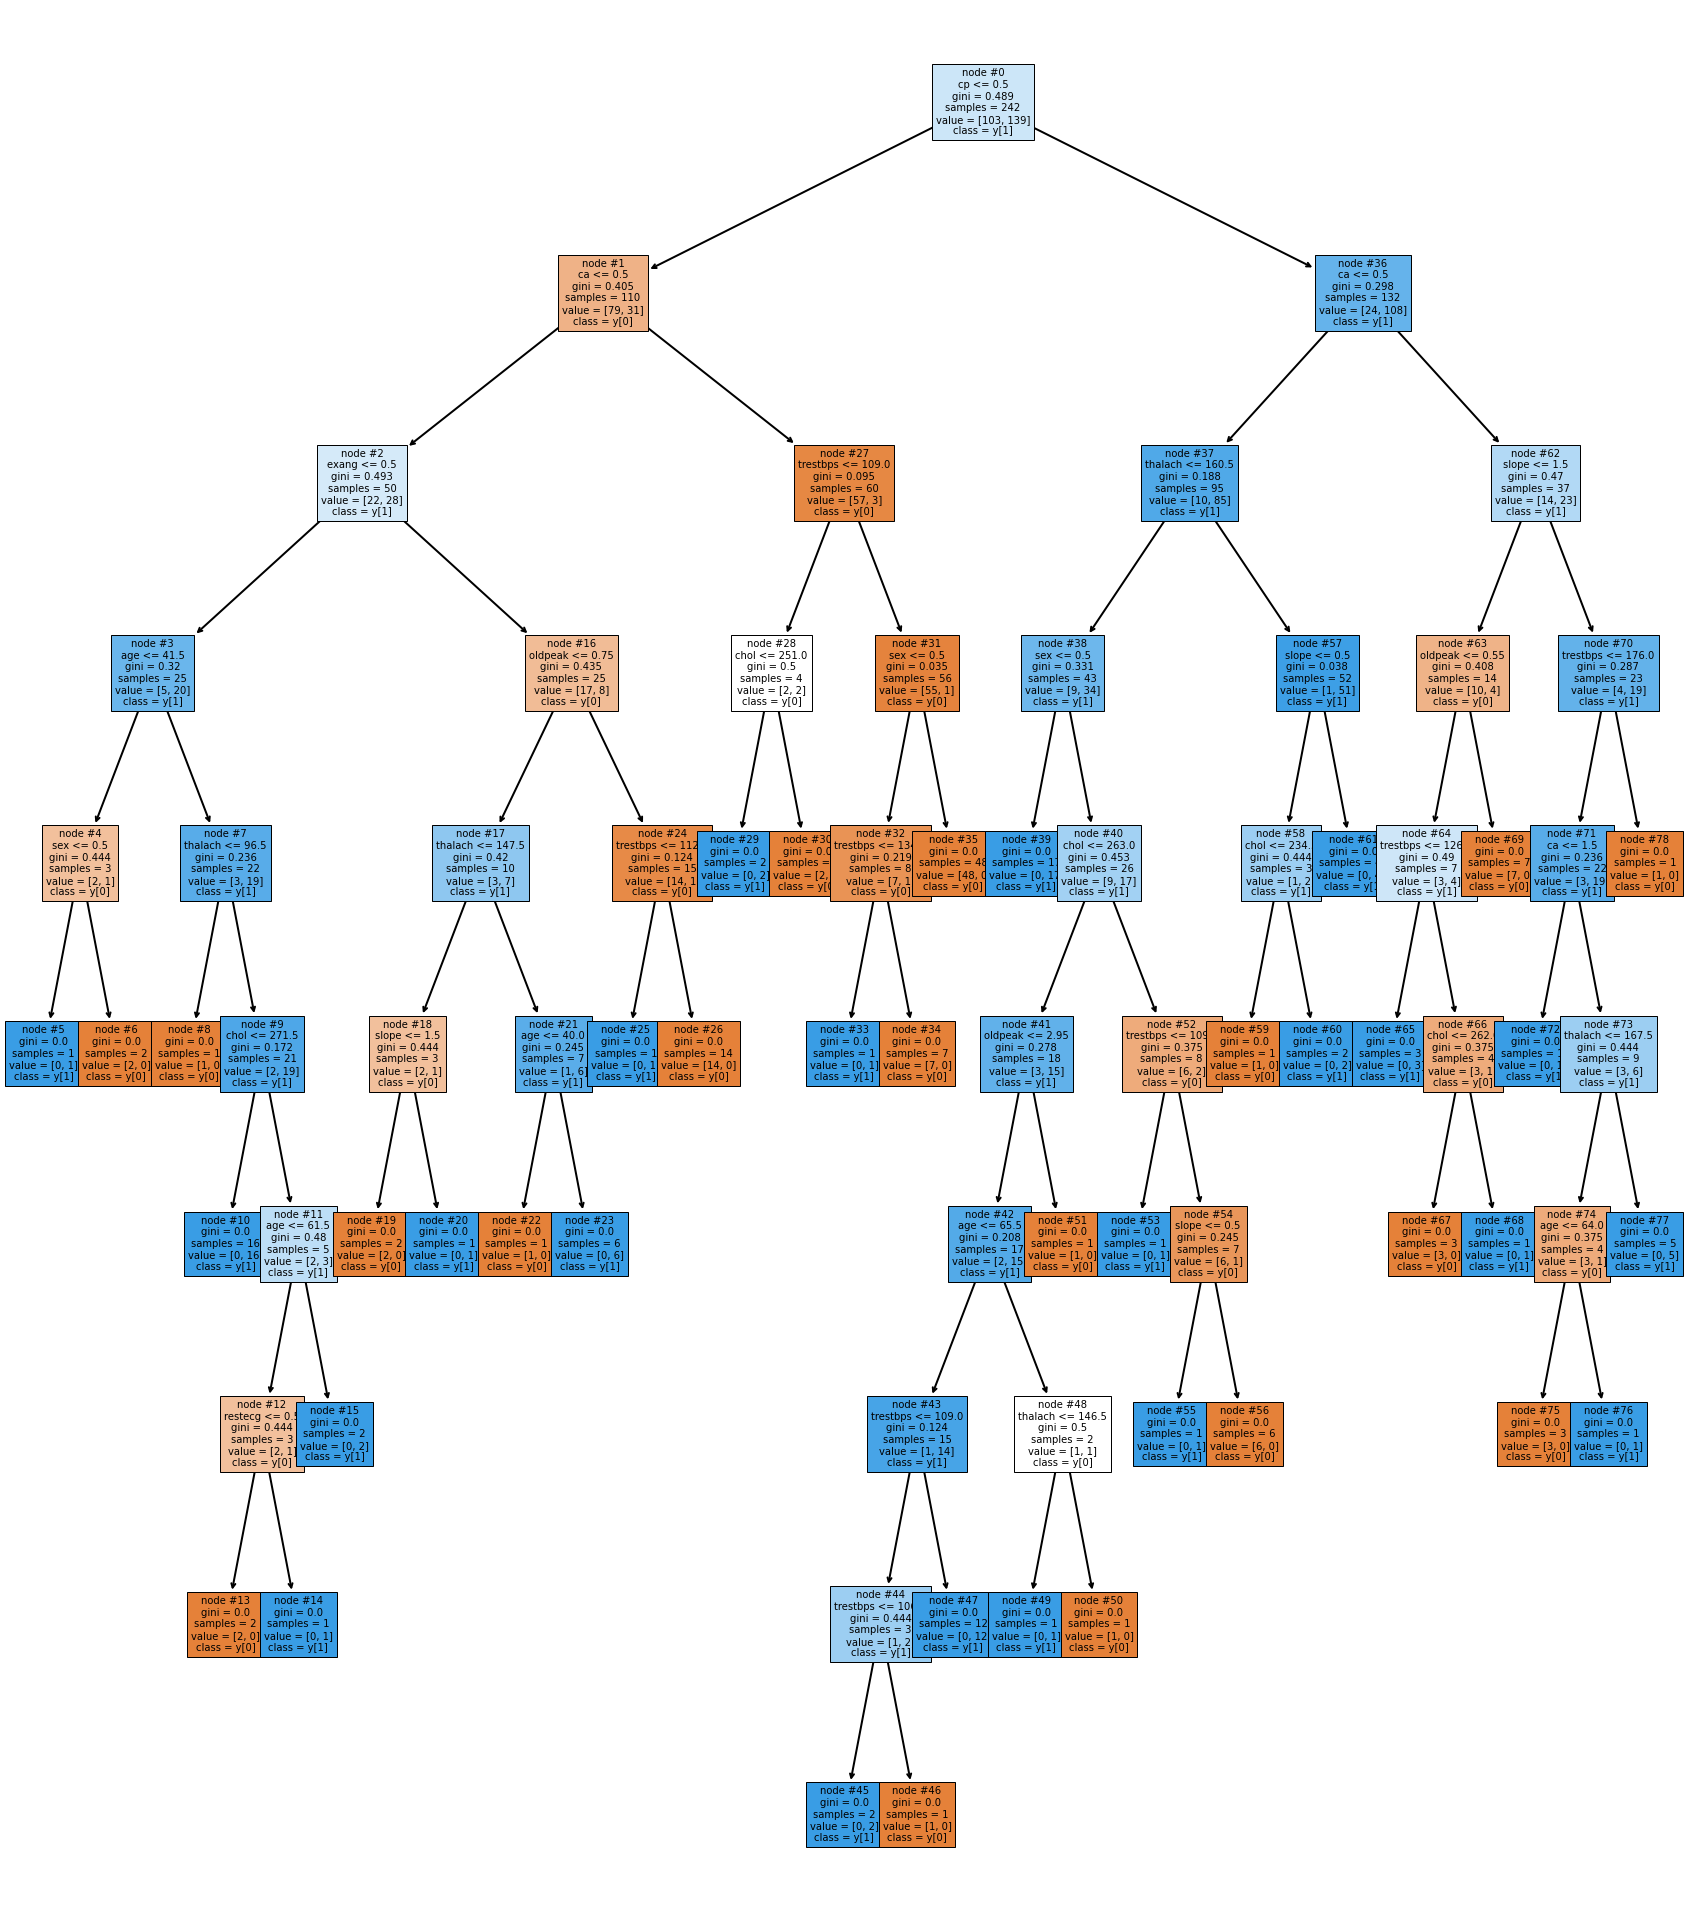

In [71]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,35))
f = plot_tree(model2, feature_names=X.columns, filled=True, fontsize=10, node_ids=True,class_names=True)
for ff in f:
    arrow = ff.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)